In [10]:
import numpy as np 
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
class k_means:
    def __init__(self,original_image):
        # original_image = cv2.imread("images/island.jpeg")
        self.img = cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
        self.img = cv2.normalize(self.img,None,0,255,cv2.NORM_MINMAX)
        self.vectorized = self.img.reshape((-1,3))
        self.vectorized = np.float32(self.vectorized)

    
    def process(self, K):
        criteria = (cv2.TERM_CRITERIA_EPS + 
			        cv2.TERM_CRITERIA_MAX_ITER,10,1.0)

        attempts = 10 
        ret,label,center = cv2.kmeans(self.vectorized,K,None,criteria,attempts,
                                        cv2.KMEANS_PP_CENTERS)

        center = np.uint8(center)
        res = center[label.flatten()]
        self.result_image = res.reshape((self.img.shape))
        return self.result_image
        # figure_size = 8
        # plt.figure(figsize=(figure_size,figure_size))
        # plt.subplot(1,2,1),plt.imshow(self.img)
        # plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        # plt.subplot(1,2,2),plt.imshow(self.result_image)
        # plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
        # plt.show()

In [50]:
path = "C:/SWdacon/minseo/data/"
csv_file = path+'test.csv'
train_img_path = path+'test_img/'

In [51]:
# RLE 디코딩 함수
def rle_decode(mask_rle, shape):
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [52]:
csv = pd.read_csv(csv_file)

In [78]:
img_num =37

In [79]:
# mask_rle = csv.iloc[img_num, 2]
image_path = csv.iloc[img_num, 1]
image = cv2.imread(path+ image_path[2:])
# mask = rle_decode(mask_rle, (image.shape[0], image.shape[1]))
# x,y=100,100
# image = image[y:y+224,x:x+224]
# mask = mask[y:y+224,x:x+224]

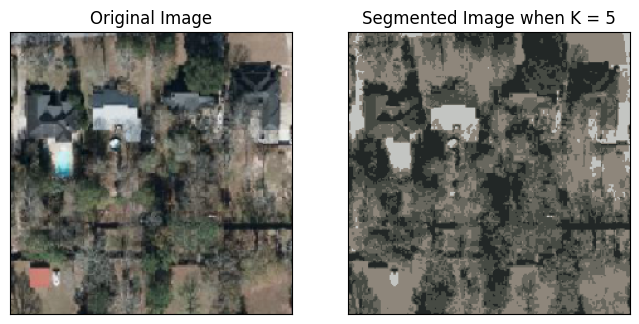

In [80]:
k_means(image).process(5)
# fig = plt.figure()
# ax1 = fig.add_subplot(1,3,1)
# ax1.imshow(mask)
# ax1.set_title('mask')